In [1]:
import pandas as pd
import numpy as np

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier , export_graphviz 
from sklearn.model_selection import train_test_split

from matplotlib import pyplot as plt
import seaborn as sns

import graphviz
import pydotplus
import io
from scipy import misc
import imageio


In [2]:
data= pd.read_excel("bankModif.xlsx")

In [3]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 16 columns):
age            4521 non-null int64
job            4521 non-null int64
marital        4521 non-null int64
default        4521 non-null int64
balance        4521 non-null int64
housing        4521 non-null int64
loan           4521 non-null int64
day            4521 non-null int64
month          4521 non-null int64
lastcontact    4521 non-null int64
duration       4521 non-null int64
campaign       4521 non-null int64
pdays          4521 non-null int64
previous       4521 non-null int64
poutcome       4521 non-null int64
y              4521 non-null object
dtypes: int64(15), object(1)
memory usage: 565.2+ KB


In [4]:
data.describe()

,age,job,marital,default,balance,housing,loan,day,month,lastcontact,duration,campaign,pdays,previous,poutcome
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,5.161469,0.645875,0.016810,1422.657819,0.566025,0.152842,15.915284,6.166777,200.918602,263.961292,2.793630,39.766645,0.542579,-0.834550
std,10.576211,3.360564,0.870617,0.128575,3009.638142,0.495676,0.359875,8.247667,2.378380,72.482537,259.856633,3.109807,100.121124,1.693562,0.441799
min,19.000000,-1.000000,0.000000,0.000000,-3313.000000,0.000000,0.000000,1.000000,1.000000,37.000000,4.000000,1.000000,-1.000000,0.000000,-1.000000
25%,33.000000,2.000000,0.000000,0.000000,69.000000,0.000000,0.000000,9.000000,5.000000,161.000000,104.000000,1.000000,-1.000000,0.000000,-1.000000
50%,39.000000,6.000000,0.000000,0.000000,444.000000,1.000000,0.000000,16.000000,6.000000,185.000000,185.000000,2.000000,-1.000000,0.000000,-1.000000
75%,49.000000,9.000000,2.000000,0.000000,1480.000000,1.000000,0.000000,21.000000,8.000000,245.000000,329.000000,3.000000,-1.000000,0.000000,-1.000000
max,87.000000,10.000000,2.000000,1.000000,71188.000000,1.000000,1.000000,31.000000,12.000000,391.000000,3025.000000,50.000000,871.000000,25.000000,1.000000


In [5]:
train , test = train_test_split(data, test_size=0.15)

In [6]:
c=DecisionTreeClassifier(min_samples_split= 500) 

In [7]:
features=["age","job","marital","default","balance","housing","loan","lastcontact","duration","campaign","pdays","previous"]
X_train= train[features]
y_train = train["y"]

X_test= test[features]
y_test= test["y"]


In [8]:
y_test

4042     no
3007     no
919      no
4030     no
1233     no
       ... 
4406     no
3695    yes
992      no
520      no
2703     no
Name: y, Length: 679, dtype: object

In [9]:
dt= c.fit(X_train, y_train)

In [10]:
def show_tree(tree,features, path):
    f=io.StringIO()
    export_graphviz(tree,out_file=f,feature_names=features)
    pydotplus.graph_from_dot_data(f.getvalue()).write_png(path)
    img = imageio.imread((path))
    plt.rcParams["figure.figsize"] = (70, 70)
    plt.imshow(img)

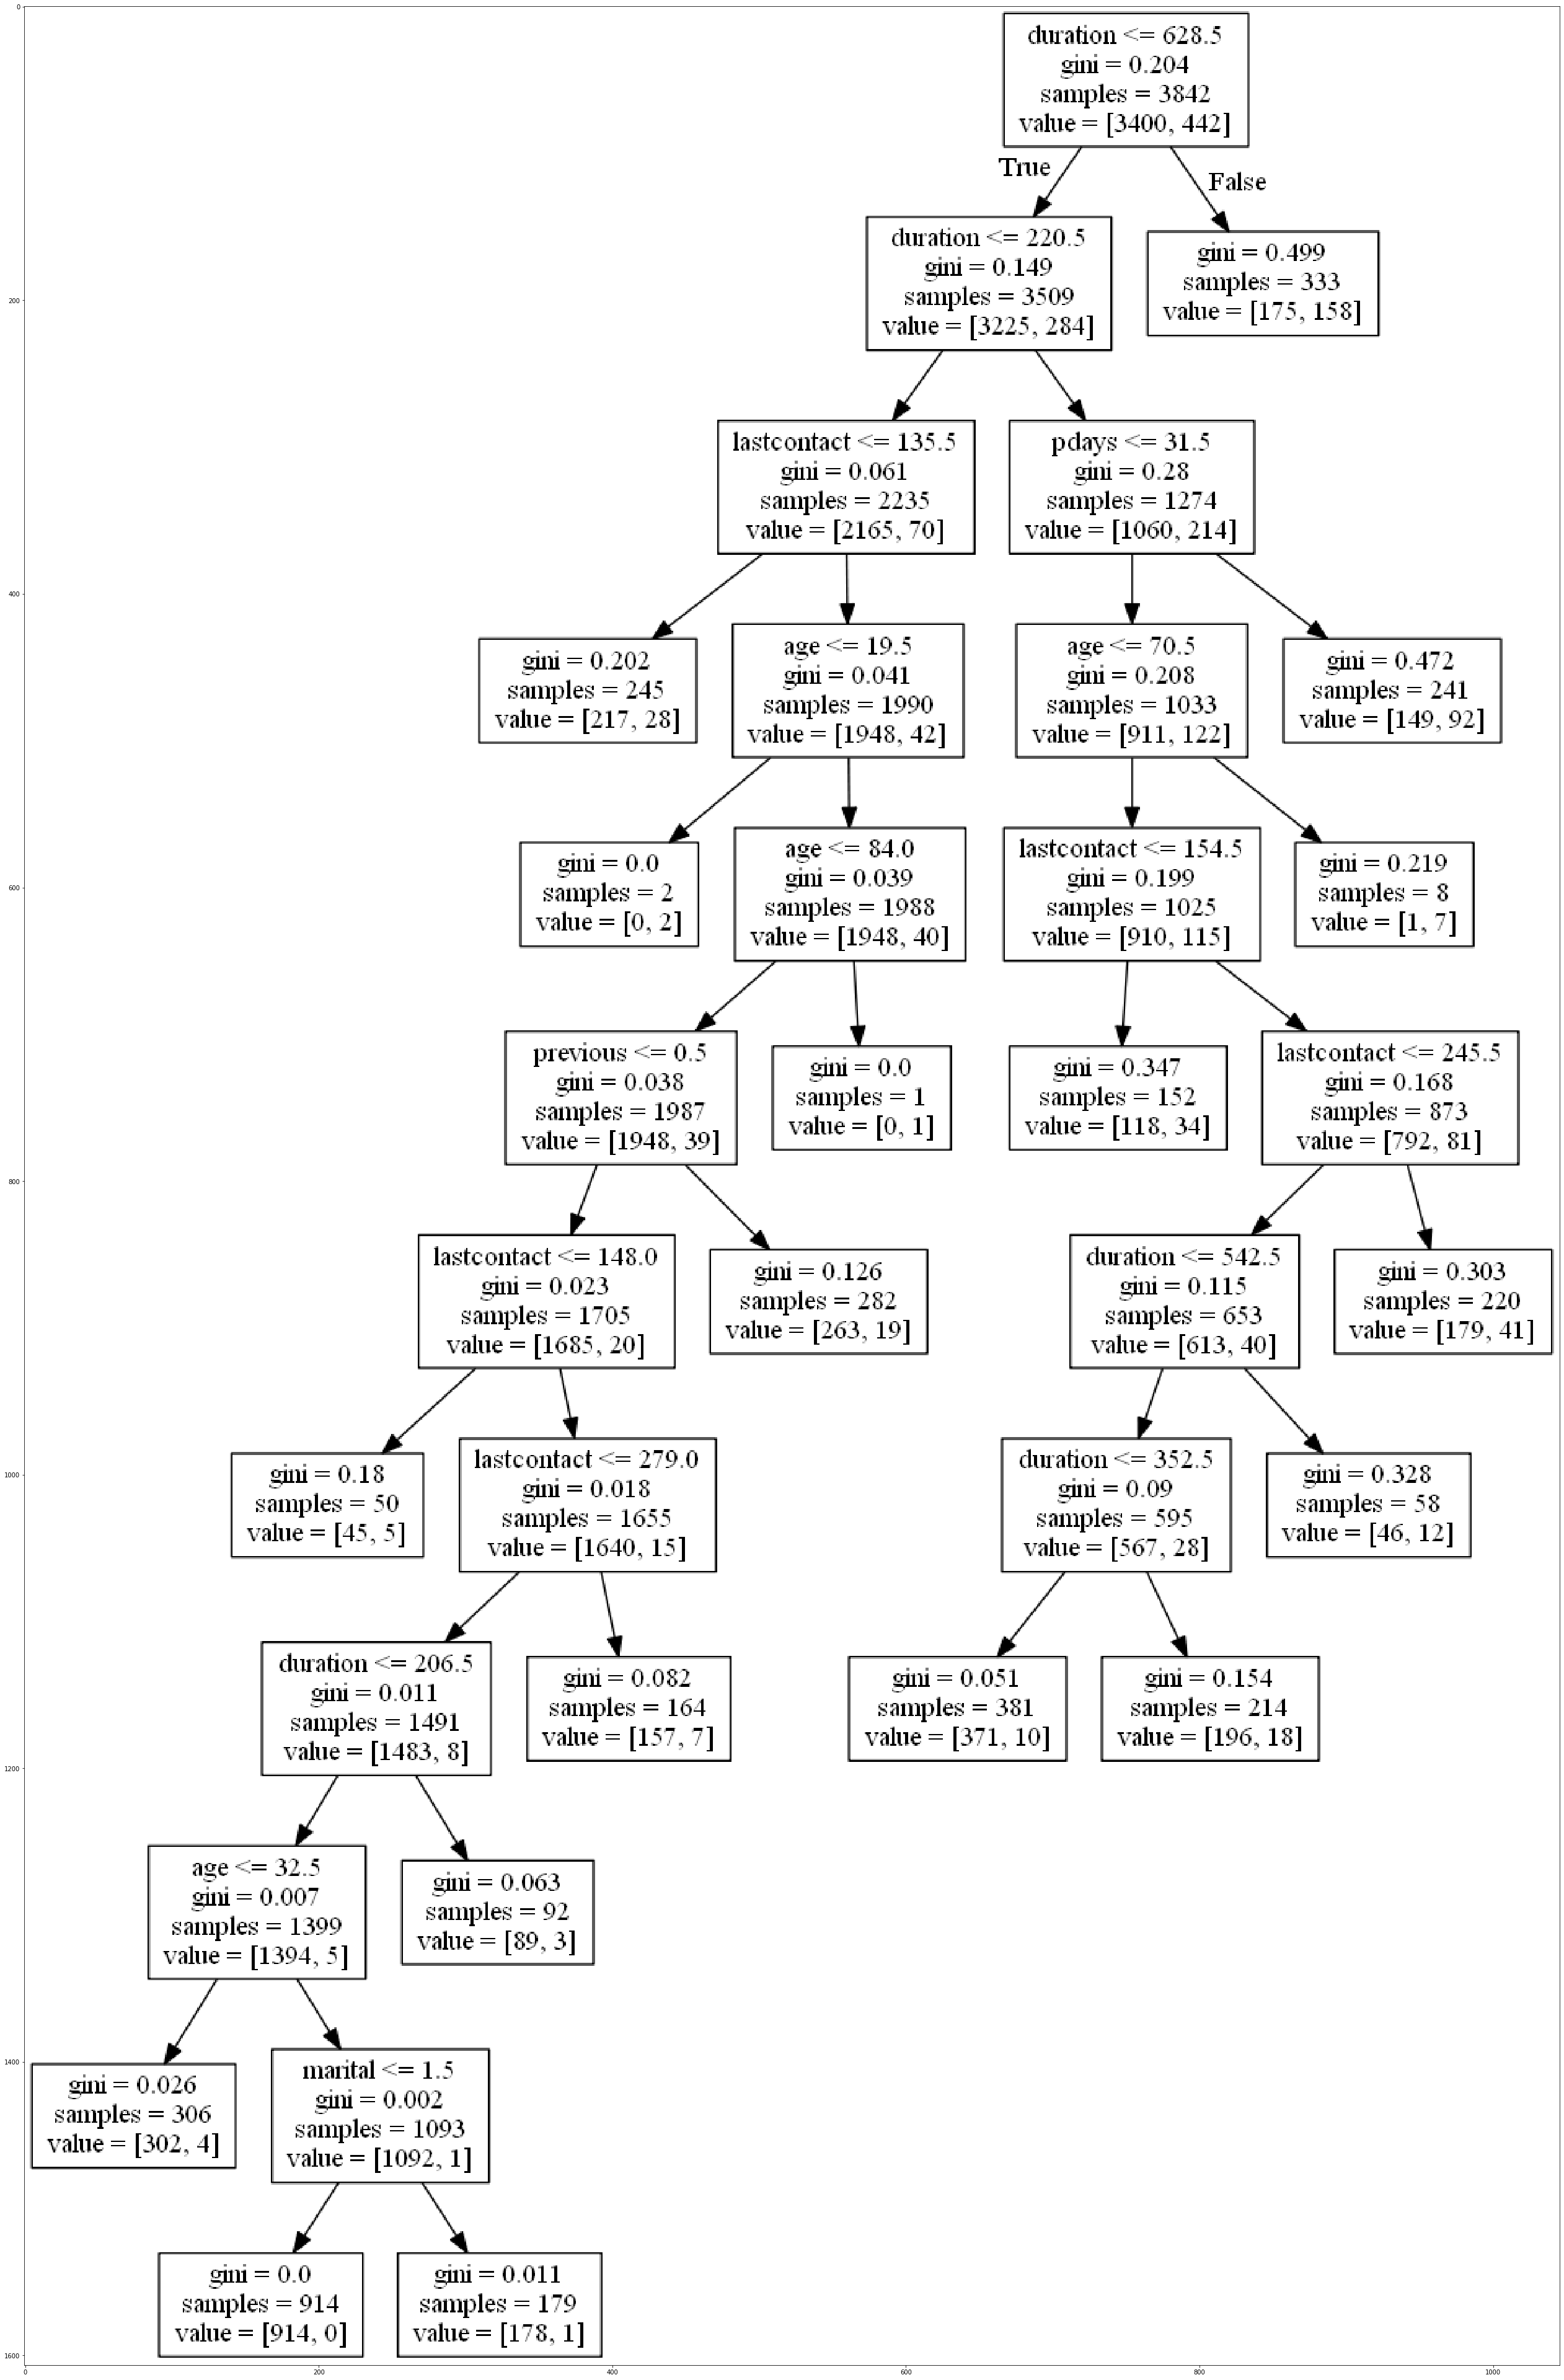

In [11]:
show_tree(dt,features,"image1Modif.png")

In [12]:
y_pred=c.predict(X_test)

In [13]:
y_pred

array(['no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'n

In [14]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,y_pred)*100
print("precision ", round(score,1),"%")

precision  87.9 %


In [15]:
from sklearn.metrics import classification_report
print (classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          no       0.88      0.99      0.94       600
         yes       0.00      0.00      0.00        79

    accuracy                           0.88       679
   macro avg       0.44      0.50      0.47       679
weighted avg       0.78      0.88      0.83       679

